## Title: Game of Thrones: The Network analysis

## INTRODUCTION

Game of thrones is a popular television series which is based on George R Martin's book series; A Song of Ice and Fire. The intricases of the characters is both intriguing and confusing. Thus, I would be using network analysis to obtain more information on the characters. Network analysis provides the capacity to estimate complex patterns of relationships and the network structure can be analysed to reveal core features of the network.The aim of this analysis is to use network analysis to evaluate who the most famous or important character is. It is quite interesting to note that the famous characters change per book.I will use three aspects of network analysis to determine who the most famous character is. These includes Degree centrality, Betweenness centrality and Page rank. 

</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_76/img/got_network.jpeg" style="width: 550px"></p>
<p>
    

 ## Content
 

In [ ]:
#Step 1: Setting up my working environment
#Step 2: Load the data and get an overview 
#Step 3: Read the data row by row and set the edges
#Step 4: Finding the most famous character in Game of Thrones: Degree centrality 
#Step 5: Evolution of Famous characters using Degree Centrality
#Step 6: Finding the most famous character in Game of Thrones: Betweenness centrality
#Step 7: Evolution of Famous characters using Betweenness Centrality
#Step 8: Finding the most famous character in Game of Thrones: Page Rank
#Step 9: Evolution of Famous characters using Google Page Rank
#Step 10: The correlation between Degree centrality, Betweenness centrality, PageRank
#Step 11: Conclusion 
       # References

# Step 1: Setting up my working environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
import networkx as nx
import seaborn as sns; sns.set()


%matplotlib inline

# Step 2: Loading the datasets

In [2]:
import os
os.chdir("C:/Users/monal/OneDrive/Desktop/Game of thrones dataset")


In [3]:
book1 = pd.read_csv("book1.csv")
book2 = pd.read_csv("book2.csv")
book3 = pd.read_csv("book3.csv")
book4 = pd.read_csv("book4.csv")
book5 = pd.read_csv("book5.csv")

#### Interpretation
Source and target are the two nodes that are linked by an edge. 
Type shows that the edges are bidirectional.  
Weight represents the number of interactions that the characters have had over the book.  
Book column depicts the book number e.g A clash of Kings (Book 1).


In [4]:
#Getting an overview of books 1 and 5 of the dataset
book1.head()


,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [5]:
book5.head()

,Source,Target,Type,weight,book
0,Aegon-I-Targaryen,Daenerys-Targaryen,undirected,4,5
1,Aegon-Targaryen-(son-of-Rhaegar),Daenerys-Targaryen,undirected,11,5
2,Aegon-Targaryen-(son-of-Rhaegar),Elia-Martell,undirected,4,5
3,Aegon-Targaryen-(son-of-Rhaegar),Franklyn-Flowers,undirected,3,5
4,Aegon-Targaryen-(son-of-Rhaegar),Haldon,undirected,14,5


In [6]:
#Creating an empty graph object for each book because the network is undirected. 
G_book1 = nx.Graph()
G_book2 = nx.Graph()
G_book3 = nx.Graph()
G_book4 = nx.Graph()
G_book5 = nx.Graph()

# Step 3: Read the data row by row and set the edges

In [7]:
for row in book1.iterrows():
    G_book1.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1])
for row in book2.iterrows():
    G_book2.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1])
for row in book3.iterrows():
    G_book3.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1])
for row in book4.iterrows():
    G_book4.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1])
for row in book5.iterrows():
    G_book5.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1])
    

In [8]:
#Creates a list of networks for all the books
G_books = [G_book1, G_book2, G_book3, G_book4, G_book5]

## Step 4: Finding the most famous character: Degree centrality 

Degree centrality is defined as the number of connections incident to the node of interest. For instance, the number of instagram followers a person has can be used as a yardstick for social status assessment.  

In [9]:
#Degree centrality of books 1 to 5 
deg_cen_book1 = nx.degree_centrality(G_books[0])
deg_cen_book2 = nx.degree_centrality(G_books[1])
deg_cen_book3 = nx.degree_centrality(G_books[2])
deg_cen_book4 = nx.degree_centrality(G_books[3])
deg_cen_book5 = nx.degree_centrality(G_books[4])


In [10]:
#Sorting the 10 Most famous characters in Game of thrones and printing the top five charachters.
sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse = True)[0:10]
print("5 Most famous characters in Book 1 according to Degree Centrality")
print(sorted_deg_cen_book1[0:5])

5 Most famous characters in Book 1 according to Degree Centrality
[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572)]


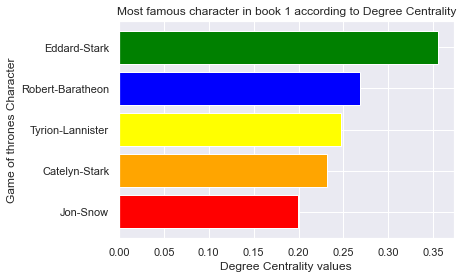

In [11]:
y = [ "Jon-Snow","Catelyn-Stark", "Tyrion-Lannister", "Robert-Baratheon" , "Eddard-Stark" ]
x = [0.19892473118279572 ,0.23118279569892475,0.24731182795698928, 0.2688172043010753, 0.3548387096774194 ]
c = ["red", "orange", "yellow", "blue","green"]
plt.barh(y, x, color = c )
plt.title('Most famous character in book 1 according to Degree Centrality')
plt.ylabel('Game of thrones Character')
plt.xlabel('Degree Centrality values')
plt.show()

In [12]:
#Sorting the 10 Most famous characters in and printing the top five characters.
sorted_deg_cen_book2 = sorted(deg_cen_book2.items(), key=lambda x:x[1], reverse = True)[0:10]
print("5 Most famous characters in Book 2 according to Degree Centrality")
print(sorted_deg_cen_book2[0:5])

5 Most famous characters in Book 2 according to Degree Centrality
[('Tyrion-Lannister', 0.2054263565891473), ('Joffrey-Baratheon', 0.1821705426356589), ('Cersei-Lannister', 0.16666666666666666), ('Arya-Stark', 0.15503875968992248), ('Stannis-Baratheon', 0.1434108527131783)]


In [13]:
#Sorting the 10 Most famous characters in and printing the top five characters.
sorted_deg_cen_book3 = sorted(deg_cen_book3.items(), key=lambda x:x[1], reverse = True)[0:10]
print("5 Most famous characters in Book 3 according to Degree Centrality")
print(sorted_deg_cen_book3[0:5])

5 Most famous characters in Book 3 according to Degree Centrality
[('Tyrion-Lannister', 0.19536423841059603), ('Jon-Snow', 0.17218543046357615), ('Joffrey-Baratheon', 0.16556291390728478), ('Robb-Stark', 0.16225165562913907), ('Sansa-Stark', 0.15894039735099338)]


In [14]:
#Sorting the 10 Most famous characters in and printing the top five characters.
sorted_deg_cen_book4 = sorted(deg_cen_book4.items(), key=lambda x:x[1], reverse = True)[0:10]
print("5 Most famous characters in Book 4 according to Degree Centrality")
print(sorted_deg_cen_book4[0:5])

5 Most famous characters in Book 4 according to Degree Centrality
[('Jaime-Lannister', 0.23443223443223443), ('Cersei-Lannister', 0.21978021978021978), ('Brienne-of-Tarth', 0.10256410256410256), ('Tyrion-Lannister', 0.09523809523809523), ('Margaery-Tyrell', 0.09157509157509157)]


In [15]:
#Sorting the 10 Most famous characters in and printing the top five characters.
sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse = True)[0:10]
print("5 Most famous characters in Book 5 according to Degree Centrality")
print(sorted_deg_cen_book5[0:5])

5 Most famous characters in Book 5 according to Degree Centrality
[('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544)]


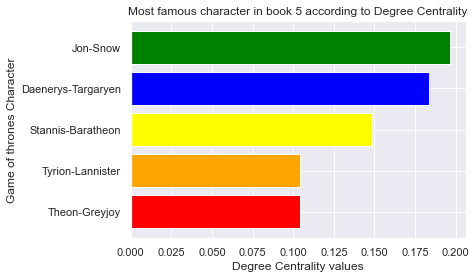

In [16]:
y = ["Theon-Greyjoy" , "Tyrion-Lannister" , "Stannis-Baratheon", "Daenerys-Targaryen", "Jon-Snow" ]
x = [0.10443037974683544 ,0.10443037974683544,0.14873417721518986, 0.18354430379746836, 0.1962025316455696 ]
c = ["red", "orange", "yellow", "blue","green"]
plt.barh(y, x, color = c )
plt.title('Most famous character in book 5 according to Degree Centrality')
plt.ylabel('Game of thrones Character')
plt.xlabel('Degree Centrality values')
plt.show()

## Step 5: Evolution of Famous characters using Degree Centrality

The character evolution using degree centrality illustrates how character fame or importance changes during the course of the five books.
Here, I look at the evolution of degree centrality of three characters who showed up severally during the degree centrality analysis i.e Eddard Stark, Jon Snow, and Tyrion Lannister.

<AxesSubplot:>

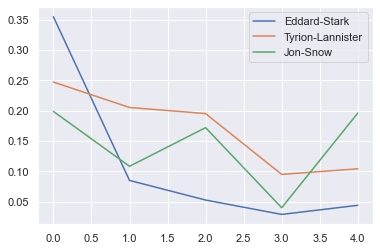

In [17]:
#Creating a graph of character evolution
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in G_books]
 
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow.
degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot()

## Step 6: Finding the most famous character: Betweenness Centrality

Betweenness centrality gives information on how important a node is in the average pathway between other pairs of nodes. It is defined as the fraction of all possible shortest paths between any pair of nodes that pass through the node. 

In [18]:
#Using the betweenness centrality method to find the most famous character inorder to compare results with within centrality
bet_cen_book1 = nx.betweenness_centrality(G_books[0])
bet_cen_book2 = nx.betweenness_centrality(G_books[1])
bet_cen_book3 = nx.betweenness_centrality(G_books[2])
bet_cen_book4 = nx.betweenness_centrality(G_books[3])
bet_cen_book5 = nx.betweenness_centrality(G_books[4])

In [19]:
#Sorting the 10 Most famous characters in Game of thrones and printing the top five characters.
sorted_bet_cen_book1 = sorted(bet_cen_book1.items(), key=lambda x:x[1], reverse = True)[0:10]
print("5 Most famous characters in Book 1 according to Betweenness Centrality")
print(sorted_bet_cen_book1[0:5])

5 Most famous characters in Book 1 according to Betweenness Centrality
[('Eddard-Stark', 0.2696038913836117), ('Robert-Baratheon', 0.21403028397371796), ('Tyrion-Lannister', 0.1902124972697492), ('Jon-Snow', 0.17158135899829566), ('Catelyn-Stark', 0.1513952715347627)]


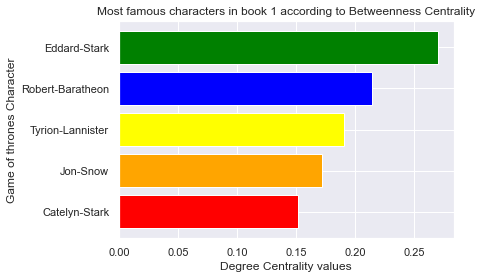

In [20]:
y = ["Catelyn-Stark", "Jon-Snow", "Tyrion-Lannister", "Robert-Baratheon" , "Eddard-Stark" ]
x = [0.1513952715347627 ,0.17158135899829566,0.1902124972697492, 0.21403028397371796, 0.2696038913836117 ]
c = ["red", "orange", "yellow", "blue","green"]
plt.barh(y, x, color = c )
plt.title('Most famous characters in book 1 according to Betweenness Centrality')
plt.ylabel('Game of thrones Character')
plt.xlabel('Degree Centrality values')
plt.show()

In [21]:
#Sorting the 10 Most famous characters in Game of thrones and printing the top five characters.
sorted_bet_cen_book2 = sorted(bet_cen_book2.items(), key=lambda x:x[1], reverse = True)[0:10]
print("5 Most famous characters in Book 2 according to Betweenness Centrality")
print(sorted_bet_cen_book2[0:5])

5 Most famous characters in Book 2 according to Betweenness Centrality
[('Arya-Stark', 0.1881116846731781), ('Jon-Snow', 0.17443976935054054), ('Robb-Stark', 0.1649406213117506), ('Tyrion-Lannister', 0.15532375650368552), ('Robert-Baratheon', 0.15374366220396257)]


In [22]:
#Sorting the 10 Most famous characters in Game of thrones and printing the top five characters.
sorted_bet_cen_book3 = sorted(bet_cen_book3.items(), key=lambda x:x[1], reverse = True)[0:10]
print("5 Most famous characters in Book 3 according to Betweenness Centrality")
print(sorted_bet_cen_book3[0:5])

5 Most famous characters in Book 3 according to Betweenness Centrality
[('Jon-Snow', 0.2238286056882584), ('Robert-Baratheon', 0.1664354010358413), ('Robb-Stark', 0.16232085177685468), ('Tyrion-Lannister', 0.15409096601718392), ('Joffrey-Baratheon', 0.14189087122742164)]


In [23]:
#Sorting the 10 Most famous characters in Game of thrones and printing the top five characters.
sorted_bet_cen_book4 = sorted(bet_cen_book4.items(), key=lambda x:x[1], reverse = True)[0:10]
print("5 Most famous characters in Book 4 according to Betweenness Centrality")
print(sorted_bet_cen_book4[0:5])

5 Most famous characters in Book 4 according to Betweenness Centrality
[('Stannis-Baratheon', 0.2763060074924735), ('Cersei-Lannister', 0.2754801247893542), ('Jaime-Lannister', 0.24281879137413512), ('Balon-Greyjoy', 0.19059739280327515), ('Sansa-Stark', 0.1527539849794001)]


In [24]:
#Sorting the 10 Most famous characters in Game of thrones and printing the top five characters.
sorted_bet_cen_book5 = sorted(bet_cen_book5.items(), key=lambda x:x[1], reverse = True)[0:10]
print("5 Most famous characters in Book 5 according to Betweenness Centrality")
print(sorted_bet_cen_book5[0:5])


5 Most famous characters in Book 5 according to Betweenness Centrality
[('Stannis-Baratheon', 0.45283060689247934), ('Daenerys-Targaryen', 0.2959459062106149), ('Jon-Snow', 0.24484873673158666), ('Tyrion-Lannister', 0.20961613179551256), ('Robert-Baratheon', 0.17716906651536968)]


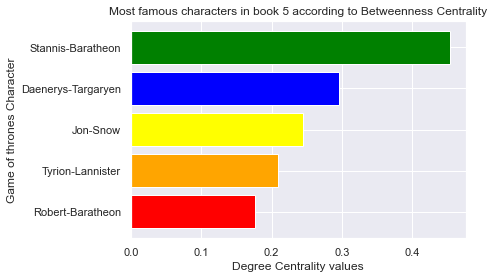

In [25]:
y = [ "Robert-Baratheon","Tyrion-Lannister", "Jon-Snow", "Daenerys-Targaryen" , "Stannis-Baratheon" ]
x = [0.17716906651536968 , 0.20961613179551256, 0.24484873673158666,0.2959459062106149, 0.45283060689247934 ]
c = ["red", "orange", "yellow", "blue","green"]
plt.barh(y, x, color = c )
plt.title("Most famous characters in book 5 according to Betweenness Centrality")
plt.ylabel("Game of thrones Character")
plt.xlabel("Degree Centrality values")
plt.show()

# Step 7: Evolution of Famous characters using Betweenness Centrality

The character evolution using betweenness centrality illustrates how character fame or importance changes during the course of the five books. Here, I look at how the famous characters evolved during the course of the five books. Betweenness centrality is used to illustrate the top 4 characters across all the books.

<AxesSubplot:>

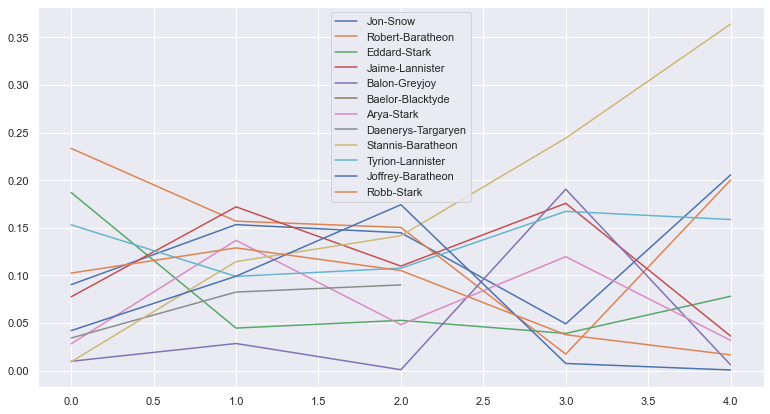

In [26]:
# Creating a graph of character evolution showing betweenness centrality of all the books.
# Creating a list of betweenness centrality of all the books

evol = [nx.betweenness_centrality(book, weight='weight') for book in G_books]

# Making a DataFrame from the list
betweenness_evol_df = pd.DataFrame(evol)
# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the evolution of the top characters
betweenness_evol_df[list_of_char].plot(figsize=(13, 7))

# Step 8: Finding the most famous character: Page rank

Page Rank allocates nodes a score based on their connections, and their connections’ connections. It is closely related to Search Engline Optimization; an algorithm that ranks web pages using Google search engine results.



In [27]:
  
page_rank_book1 = nx.pagerank(G_books[0])
page_rank_book2 = nx.pagerank(G_books[1])
page_rank_book3 = nx.pagerank(G_books[2])
page_rank_book4 = nx.pagerank(G_books[3])
page_rank_book5 = nx.pagerank(G_books[4])

In [28]:
#Sorting the 10 Most famous characters in Game of thrones and printing the top five charachters.
sorted_page_rank_book1 = sorted(page_rank_book1.items(), key=lambda x:x[1], reverse = True)[0:10]
print("5 Most famous characters in Book 1 according to Page Rank)")
print(sorted_page_rank_book1[0:5]) 

5 Most famous characters in Book 1 according to Page Rank)
[('Eddard-Stark', 0.07236162026570053), ('Robert-Baratheon', 0.04849367196106828), ('Jon-Snow', 0.04770801150205559), ('Tyrion-Lannister', 0.04367631315626212), ('Catelyn-Stark', 0.03466661321136357)]


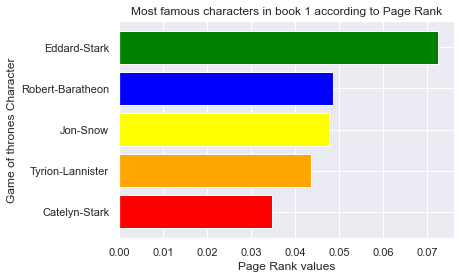

In [29]:
y = ["Catelyn-Stark", "Tyrion-Lannister", "Jon-Snow", "Robert-Baratheon" , "Eddard-Stark" ]
x = [0.03466661321136357 ,0.04367631315626212,0.04770801150205559, 0.04849367196106828, 0.07236162026570053 ]
c = ["red", "orange", "yellow", "blue","green"]
plt.barh(y, x, color = c )
plt.title("Most famous characters in book 1 according to Page Rank")
plt.ylabel("Game of thrones Character")
plt.xlabel("Page Rank values")
plt.show()

In [30]:
#Sorting the 10 Most famous characters in Game of thrones and printing the top five charachters.
sorted_page_rank_book2 = sorted(page_rank_book2.items(), key=lambda x:x[1], reverse = True)[0:10]
print("5 Most famous characters in Book 2 according to Page Rank)")
print(sorted_page_rank_book2[0:5])

5 Most famous characters in Book 2 according to Page Rank)
[('Tyrion-Lannister', 0.04686929713792863), ('Joffrey-Baratheon', 0.033513892358559484), ('Bran-Stark', 0.0320653883199087), ('Arya-Stark', 0.029019038425504035), ('Stannis-Baratheon', 0.02882124894104868)]


In [31]:
#Sorting the 10 Most famous characters in Game of thrones and printing the top five charachters.
sorted_page_rank_book3 = sorted(page_rank_book3.items(), key=lambda x:x[1], reverse = True)[0:10]
print("5 Most famous characters in Book 3 according to Page Rank)")
print(sorted_page_rank_book3[0:5])

5 Most famous characters in Book 3 according to Page Rank)
[('Jon-Snow', 0.037954125938873554), ('Tyrion-Lannister', 0.03639315478585651), ('Robb-Stark', 0.027921656742283554), ('Jaime-Lannister', 0.027516349896922133), ('Joffrey-Baratheon', 0.025867042867943647)]


In [32]:
#Sorting the 10 Most famous characters in Game of thrones and printing the top five charachters.
sorted_page_rank_book4 = sorted(page_rank_book4.items(), key=lambda x:x[1], reverse = True)[0:10]
print("5 Most famous characters in Book 1 according to Page Rank)")
print(sorted_page_rank_book4[0:5])

5 Most famous characters in Book 1 according to Page Rank)
[('Cersei-Lannister', 0.05734758766506148), ('Jaime-Lannister', 0.049880284420102616), ('Brienne-of-Tarth', 0.024111051873836446), ('Samwell-Tarly', 0.023794492675150627), ('Tommen-Baratheon', 0.019658175948263745)]


In [33]:
#Sorting the 10 Most famous characters in Game of thrones and printing the top five charachters.
sorted_page_rank_book5 = sorted(page_rank_book5.items(), key=lambda x:x[1], reverse = True)[0:10]
print("5 Most famous characters in Book 5 according to Page Rank)")
print(sorted_page_rank_book5[0:5])

5 Most famous characters in Book 5 according to Page Rank)
[('Jon-Snow', 0.05957228608306987), ('Daenerys-Targaryen', 0.044292354488861735), ('Stannis-Baratheon', 0.03481869037148469), ('Tyrion-Lannister', 0.028882459103007543), ('Theon-Greyjoy', 0.02504053710744327)]


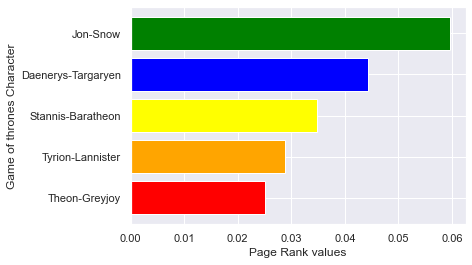

In [34]:
y = [ "Theon-Greyjoy","Tyrion-Lannister", "Stannis-Baratheon" , "Daenerys-Targaryen" , "Jon-Snow"  ]
x = [0.02504053710744327 , 0.028882459103007543, 0.0348186903714846,0.044292354488861735, 0.05957228608306987 ]
c = ["red", "orange", "yellow", "blue","green"]
plt.barh(y, x, color = c )
data = [23, 45, 56, 78, 213]
plt.ylabel("Game of thrones Character")
plt.xlabel("Page Rank values")
plt.show()

# Step 9: Evolution of Famous characters using Google page rank

<AxesSubplot:>

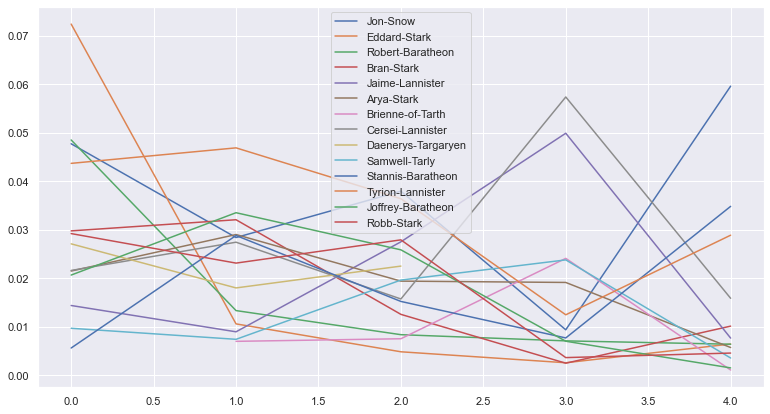

In [35]:
# Creating a list of pagerank of all the characters in all the books
evol = evol = [nx.pagerank(book) for book in G_books]

# Making a DataFrame from the list
pagerank_evol_df = pd.DataFrame(evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the top characters
pagerank_evol_df[list_of_char].plot(figsize=(13, 7))

# Step 10: The correlation between Degree centrality, Betweenness centrality and Page Rank

Having used three different methods to calculate the popularity of a node in a network,each method gave some information about the characters. Some characters pop up in each of these methods and across different books. Pearson correlation can be used to calculate the relationship between degree centrality, betweenness centrality and Page Rank for each of the game of thrones books. 


In [36]:
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
measures = [nx.pagerank(G_books[0]), 
            nx.betweenness_centrality(G_books[0], weight='weight'), 
            nx.degree_centrality(G_books[0])]

# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures)

# Calculating the correlation
cor.T.corr()

,0,1,2
0,1.000000,0.870210,0.949258
1,0.870210,1.000000,0.871385
2,0.949258,0.871385,1.000000


In [37]:
measures = [nx.pagerank(G_books[1]), 
            nx.betweenness_centrality(G_books[1], weight='weight'), 
            nx.degree_centrality(G_books[1])]

# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures)

# Calculating the correlation
cor.T.corr()

,0,1,2
0,1.000000,0.796071,0.946047
1,0.796071,1.000000,0.824200
2,0.946047,0.824200,1.000000


In [38]:
measures = [nx.pagerank(G_books[2]), 
            nx.betweenness_centrality(G_books[2], weight='weight'), 
            nx.degree_centrality(G_books[2])]

# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures)

# Calculating the correlation
cor.T.corr()

,0,1,2
0,1.000000,0.822604,0.955832
1,0.822604,1.000000,0.841844
2,0.955832,0.841844,1.000000


In [39]:
measures = [nx.pagerank(G_books[3]), 
            nx.betweenness_centrality(G_books[3], weight='weight'), 
            nx.degree_centrality(G_books[3])]

# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures)

# Calculating the correlation
cor.T.corr()

,0,1,2
0,1.000000,0.656856,0.946802
1,0.656856,1.000000,0.720553
2,0.946802,0.720553,1.000000


In [40]:
measures = [nx.pagerank(G_books[4]), 
            nx.betweenness_centrality(G_books[4], weight='weight'), 
            nx.degree_centrality(G_books[4])]

# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures)

# Calculating the correlation
cor.T.corr()

,0,1,2
0,1.000000,0.793372,0.971493
1,0.793372,1.000000,0.833816
2,0.971493,0.833816,1.000000


In [41]:
# Finding the most important character in the fifth book,according to degree centrality, betweenness centrality and pagerank.
p_rank, b_cent, d_cent = cor.idxmax(axis=1)

print(p_rank)
print(b_cent)
print(d_cent)

Jon-Snow
Stannis-Baratheon
Jon-Snow


## Step 11: Conclusion

The results show high  degree of positive correlation between these three methods for the character co-occurrence network.

Different methods  has been used to investigate the famous characters in the Game of Thrones co-occurrence network. According to all three methods, Eddard Stark is the most famous character initially in the first book. However, by book five, it was Jon Snow using degree centrality and Page rank while it was Stannis Baratheon when analysed with betweenness centrality. 

With the application of degree centrality and page rank to the evolutional analysis of the characters, Eddard Stark was detected as the most famous character. However, with the use of betweenness centrality, Stannis was the most famous character. 

Analysing through the fifth book using all three methods shows that Jon Snow is the most famous character.

The most important thing concluded from this analysis is that every book has its own protagonist. 


## References:
DataCamp — Project: A Network Analysis of Game of Thrones https://projects.datacamp.com/projects/76 created by Mridul Seth

Data set source: Kaggle. Link: https://www.kaggle.com/mmmarchetti/game-of-thrones-dataset

David Hevey (2018) Network analysis: a brief overview and tutorial, Health Psychology and Behavioral Medicine, 6:1, 301-328 
